# Activity 3: Convert and Transform Raw Data to derive certain hypothesis

### Loading libraries and the csv file to a database

In [1]:
library(RSQLite)
library(dplyr)
library(ggplot2)
library(tidyr)
library(pyramid)
input_data <- read.csv("act3_data.csv",header = TRUE)
input.df <- as.data.frame(input_data)
my_db <- src_sqlite("activity_3.sqlite",create = TRUE)
db <- dbConnect(SQLite(),dbname="activity_3.sqlite")
dbWriteTable(db, "ActivityData", input.df)
dbListTables(db)

Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] TRUE

[1] "ActivityData"

## Hypothesis I: People who owns a cell phone which isn't smart and the various reasons they mentioned

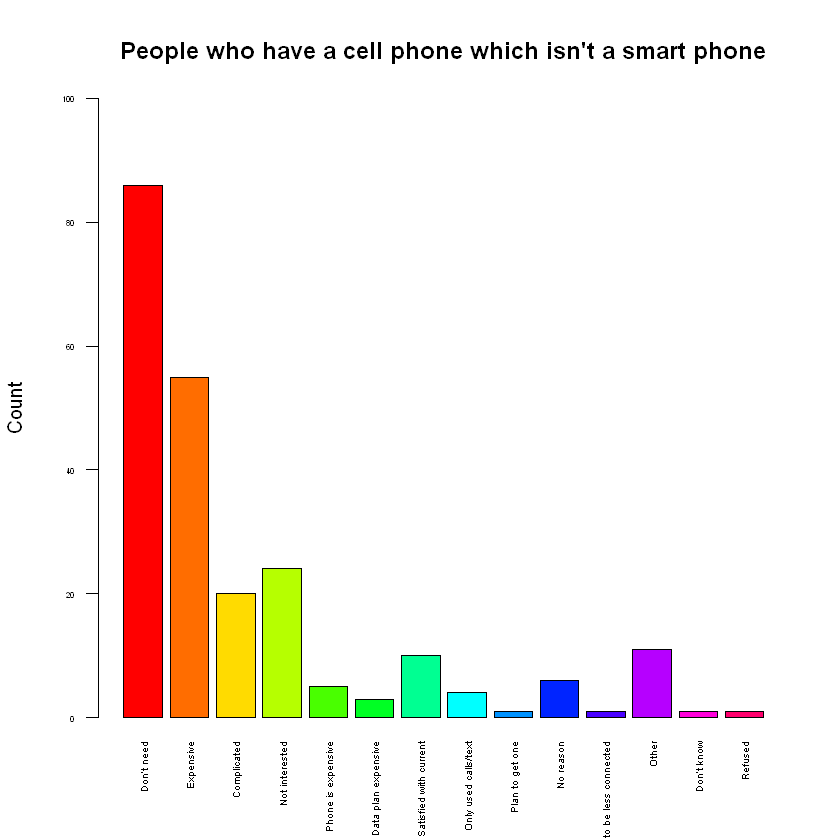

In [2]:
cell_no_smart_reason <- tbl(my_db,sql("select Q4 as Reason,count(*) as count from ActivityData where DEVICE1a = '1' and SMART1 = '2' and Q4 is not null group by Q4"))
reasons <- c("Don’t need","Expensive","Complicated","Not interested","Phone is expensive","Data plan expensive",
             "Satisfied with current","Only used calls/text","Plan to get one","No reason","Prefer to be less connected",
             "Other","Don’t know","Refused")
cell_no_smart_reason.df <- as.data.frame(cell_no_smart_reason)
write.csv(cell_no_smart_reason.df,file = "Hypothesis1.csv")
barplot(cell_no_smart_reason.df$count, names.arg=reasons,col=rainbow(14),las=2, cex.axis=0.4, cex.names=0.5, ylim=c(0,100), main = "People who have a cell phone which isn't a smart phone",ylab = "Count")

### Inference - Looking at the data we can infer that the most number of people who has a cell phone which isn't a smartphone feel that they don't need one or they felt it is too expensive

## Hypothesis 2 - Pyramid representation of the age and sex distribution of the number of people who use internet/email atleast ocassionally

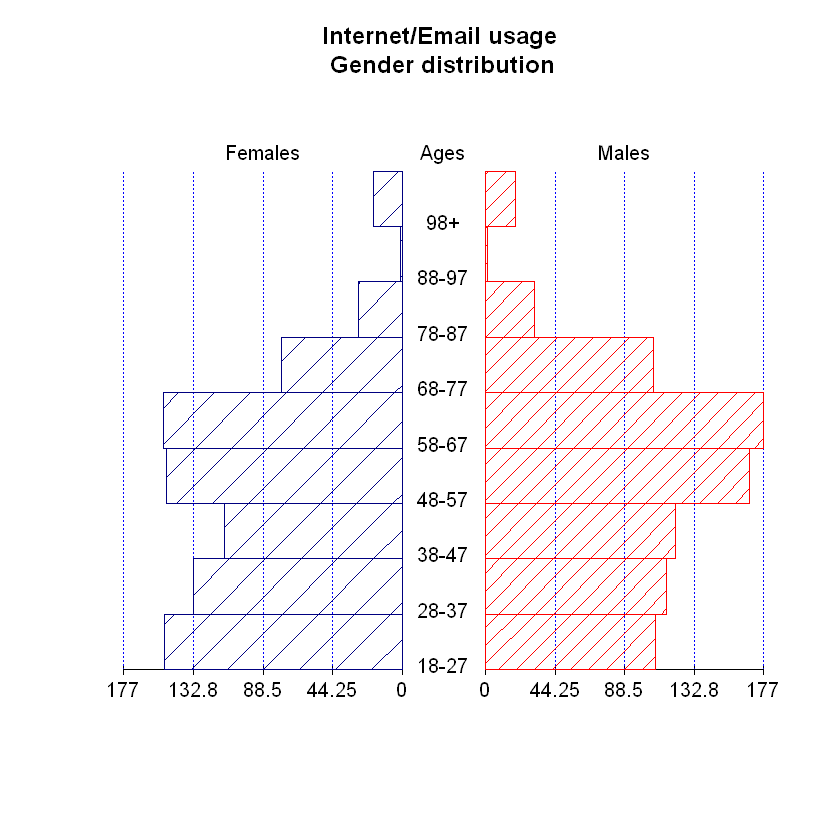

In [3]:
pyr_age_gen_dist_internet <- tbl(my_db,sql("Select m.Age_Group as ages, Male, Female 
from (Select Age_Group, count as Male from
(Select Gender, Age_Group, count(*) as count from 
(Select 
CASE Sex WHEN 1 THEN 'MALE' ELSE 'FEMALE' END Gender, CASE WHEN Age BETWEEN 18 AND 27 THEN '18-27' WHEN Age BETWEEN 28 AND 37 THEN '28-37' WHEN Age BETWEEN 38 AND 47 THEN '38-47' WHEN Age BETWEEN 48 AND 57 THEN '48-57' WHEN Age BETWEEN 58 AND 67 THEN '58-67' WHEN Age BETWEEN 68 AND 77 THEN '68-77' WHEN Age BETWEEN 78 AND 87 THEN '78-87' WHEN Age BETWEEN 88 AND 97 THEN '88-97' ELSE '98+' END AGE_GROUP from ActivityData where EMINUSE = '1') group by Gender, Age_Group) where Gender = 'MALE') m,
(Select Age_Group, count as Female from
(Select Gender, Age_Group, count(*) as count from 
(Select 
CASE Sex WHEN 1 THEN 'MALE' ELSE 'FEMALE' END Gender, CASE WHEN Age BETWEEN 18 AND 27 THEN '18-27' WHEN Age BETWEEN 28 AND 37 THEN '28-37' WHEN Age BETWEEN 38 AND 47 THEN '38-47' WHEN Age BETWEEN 48 AND 57 THEN '48-57' WHEN Age BETWEEN 58 AND 67 THEN '58-67' WHEN Age BETWEEN 68 AND 77 THEN '68-77' WHEN Age BETWEEN 78 AND 87 THEN '78-87' WHEN Age BETWEEN 88 AND 97 THEN '88-97' ELSE '98+' END AGE_GROUP from ActivityData where EMINUSE = '1') group by Gender, Age_Group) where Gender = 'FEMALE') f where m.AGE_GROUP = f.AGE_GROUP"))
pyr_age_gen_dist_internet.df <- as.data.frame(pyr_age_gen_dist_internet)
malev <- unlist(pyr_age_gen_dist_internet.df$Male)
femalev <- unlist(pyr_age_gen_dist_internet.df$Female)
agev <- unlist(pyr_age_gen_dist_internet.df$ages)
internet_usage_dist <- data.frame(malev,femalev,agev)
write.csv(pyr_age_gen_dist_internet.df,file = "Hypothesis2.csv")
pyramid(internet_usage_dist,Llab="Females",Rlab="Males",Lcol="navy", Ldens=5, Rcol="red",
Rdens=10, GL=TRUE,main="Internet/Email usage \nGender distribution")

### From the above graph we can infer that the most the majority of internet/email users are in the age group range of 58 to 67 years in both the genders.  

### There are two other age groups (18 to 27 and 48 to 57) in female who also use intenet/email ocassionally on par with the age group fo  58 to 67.

## Hypothesis 3 - Political preferences of various races

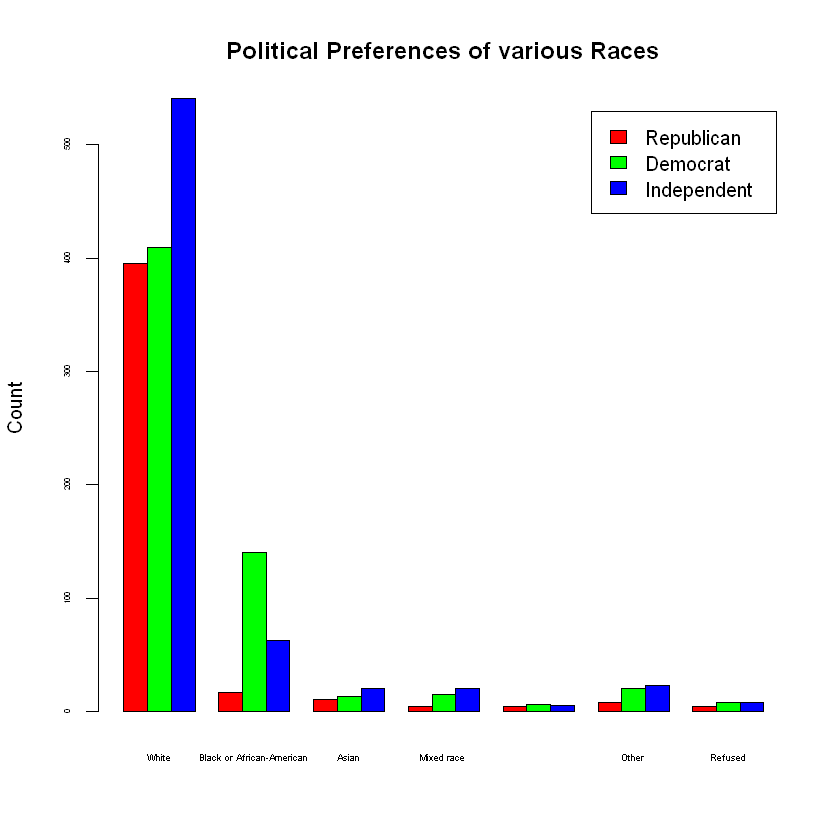

In [4]:
race_party <- tbl(my_db,sql("Select r.race, r.Republican, d.Democrat, i.Independent 
from (select Race,count(*) as Republican from ActivityData where PARTY = '1' group by race) r
left join (select Race,count(*) as Democrat from ActivityData where PARTY = '2' group by race) d on r.Race = d.race
left join (select Race,count(*) as Independent from ActivityData where PARTY = '3' group by race) i on r.Race = i.race"))
race_party.df <- as.data.frame(race_party)
races <- c("White","Black or African-American","Asian","Mixed race","Native American/American Indian","Other","Refused")
party <- c("Republican","Democrat","Independent")
write.csv(race_party.df,file = "Hypothesis3.csv")
barplot(height=t((as.matrix(race_party.df[,2:4]))),names.arg=races,col=rainbow(3),cex.axis=0.4,legend=party, cex.names=0.45,ylab="Count",main="Political Preferences of various Races",beside=TRUE)

### From the above graph we can infer that majority of the white people consider themselves as independent whereas most of the black/afro-american people consider themselves as democrats.

## Hypothesis 4

## Income range distribution of people who can afford:


## Both Cable and Internet Connection, Only Cable Connection, Only Internet Connection, Neither Cable nor Internet Conncetion

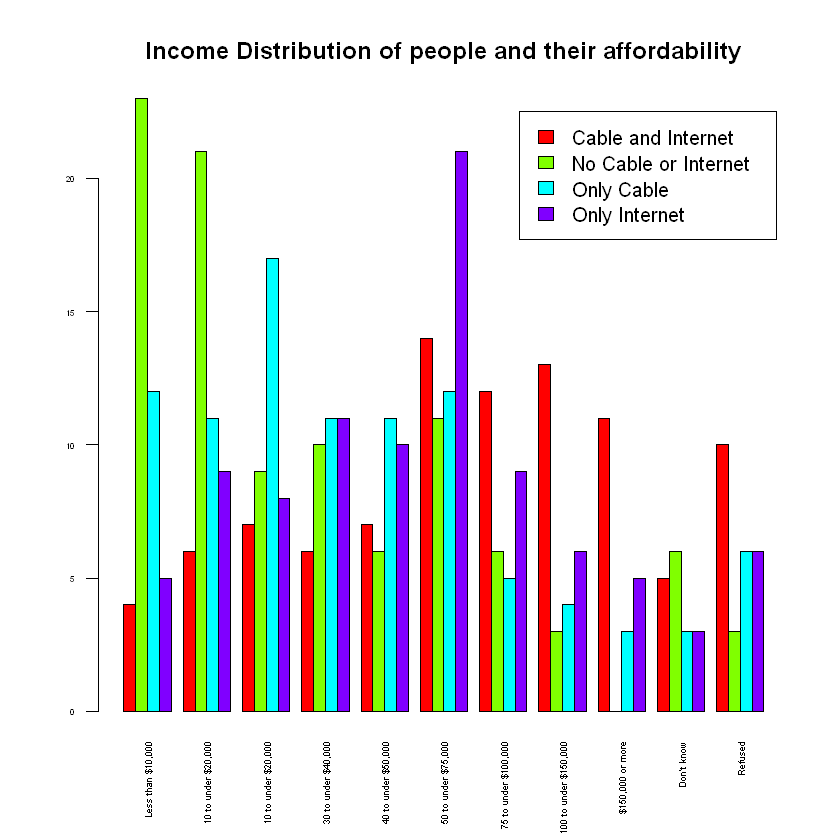

In [5]:
cabint <- tbl(my_db,sql("select 
b.Inc, b.count as bothIntCab, n.count as noIntCab, cy.count as onlyCab, iy.count as onlyInt
from 
(select INC , (count(*)*100/(select count(*) from ActivityData where CABLE1 = '1' and HOME4NW = '1')) as count from ActivityData where CABLE1 = '1' and HOME4NW = '1' group by INC) b
left join (select INC , (count(*)*100/(select count(*) from ActivityData where CABLE1 = '2' and HOME4NW = '2')) as count from ActivityData where CABLE1 = '2' and HOME4NW = '2' group by INC) n on n.Inc = b.Inc
left join (select INC , (count(*)*100/(select count(*) from ActivityData where CABLE1 = '1' and HOME4NW = '2')) as count from ActivityData where CABLE1 = '1' and HOME4NW = '2' group by INC) cy on cy.Inc = b.Inc
left join (select INC , (count(*)*100/(select count(*) from ActivityData where CABLE1 = '2' and HOME4NW = '1')) as count from ActivityData where CABLE1 = '2' and HOME4NW = '1' group by INC) iy on iy.Inc = b.Inc"))
cabint.df <- as.data.frame(cabint)
cabint.df[is.na(cabint.df)]<-0
int_cable <- c("Cable and Internet","No Cable or Internet","Only Cable","Only Internet")
salary <- c("Less than $10,000","10 to under $20,000","10 to under $20,000","30 to under $40,000","40 to under $50,000","50 to under $75,000","75 to under $100,000","100 to under $150,000","$150,000 or more","Don't know","Refused")
write.csv(cabint.df,file = "Hypothesis4.csv")
barplot(height=t((as.matrix(cabint.df[,2:5]))),names.arg=salary,col=rainbow(4),las = 2,cex.axis=0.4,legend=int_cable,main="Income Distribution of people and their affordability", cex.names=0.45,beside=TRUE)

### From the graph we can clearly state that the following observations: 

#### Majority of the people who cannot afford either cabel or internet are in the lowest income category

#### Majority of the people who can only afford cable connection falls in the medium to low income category

#### Majority of the people who can only afford internet connection falls in the medium income category

#### Majority of the people who can afford both internet and cable connection fall in the higher income range category

## Hypothesis 5 - Age and Gender distribution of people who used/not used online dating

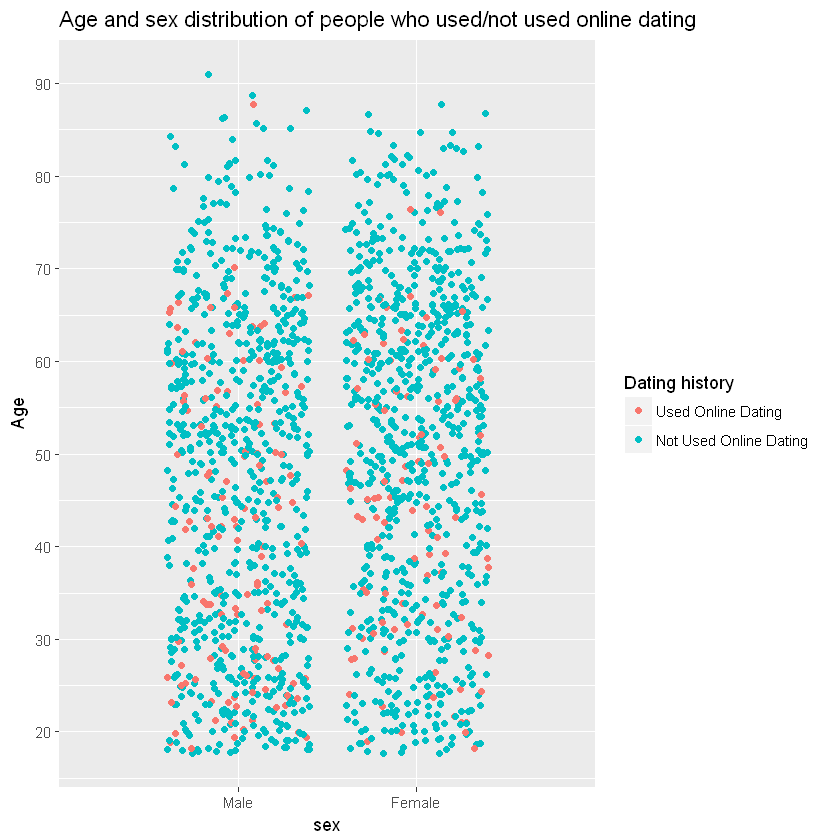

In [6]:
date_dis<-select(input.df, sex, age , date1a)
date_dis<-filter(date_dis, age<98,date1a<3)
date_dis<-collect(date_dis)
date_dis <- within(date_dis, date1a <- factor(date1a, labels = c("Used Online Dating", "Not Used Online Dating")))
date_dis <- within(date_dis, date1a <- factor(date1a))
write.csv(date_dis,file = "Hypothesis5.csv")
dis_plot<-qplot(sex, age, colour = date1a, data=date_dis, geom="jitter")
dis_plot<- dis_plot + labs(list(title="Age and sex distribution of people who used/not used online dating", y="Age", colour="Dating history"))
dis_plot<- dis_plot +  scale_y_continuous(breaks=c(0,10,20,30,40,50,60,70,80,90)) + xlim("1" = "Male", "2" = "Female")
dis_plot

## Inference:

#### From the above gitter plot we can infer that there are more males as compared to female who use online dating.

#### Also the ratio of people who used online dating to the people who did not use online dating is more in lesser age groups and decreases as the age group goes beyond 70